# California-House-Price-Prediction
This is a regression problem to predict california housing prices.

The dataset contains 20640 entries and 10 variables.

longitude

latitude

housing_median_age

total_rooms

total_bedrooms

population

households

median_income

median_house_value

ocean_proximity

# Importing required libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset

In [6]:
data=pd.read_csv('housing.csv')

In [7]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
data.shape

(20640, 10)

# Null/Missing Value Analysis

In [5]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

it can be seen that total_bedrooms is having 207 null/missing values

# Heatmap for the Null/Missing Values

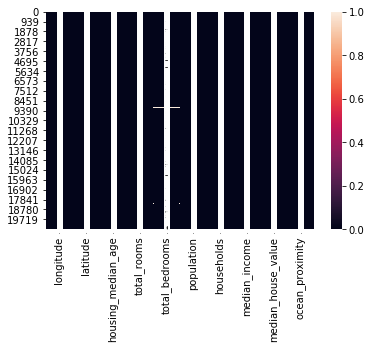

In [4]:
sns.heatmap(data.isnull(),annot=True)

Filling the null/missing values by mean of the column

In [31]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(),inplace=True)

In [32]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Now after the null value treatment our dataset is not having any null/missing value

In [33]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Counting Datapoints as per proximity 

# House Price as per ocean_proximity

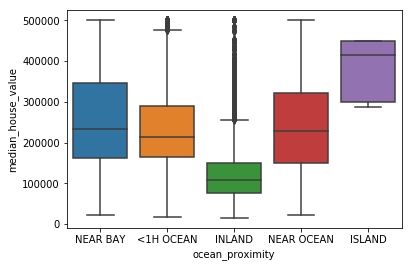

In [10]:
sns.boxplot(x='ocean_proximity',y='median_house_value',data=data)

The price of the the house is maximum is island proximity

# Encoding the non numeric values into numeric using LabelEncoder

In [34]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['ocean_proximity']      
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))

# Familiarisation of the data

In [35]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null int32
dtypes: float64(9), int32(1)
memory usage: 1.5 MB


In [21]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.165843
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,1.420662
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


# Data Visualisation using Plots

# 1.Histogram Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024A8BD15128>,
      dtype=object)

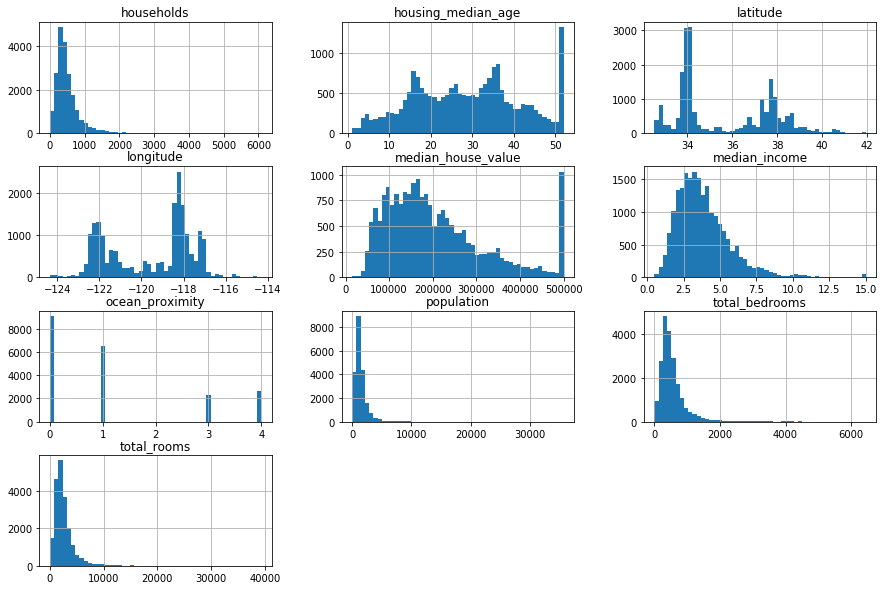

In [19]:
data.hist(bins=50,figsize=(15,10))

# 2.Line Plot 

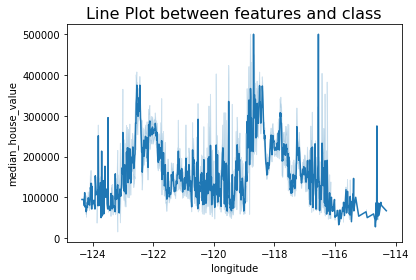

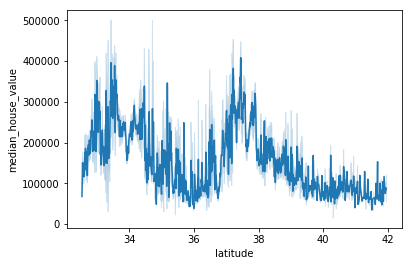

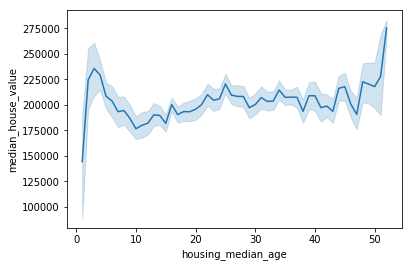

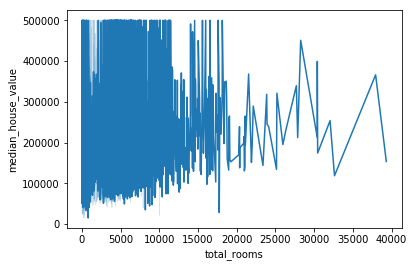

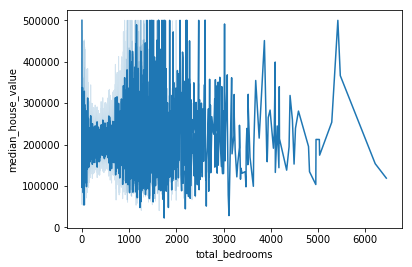

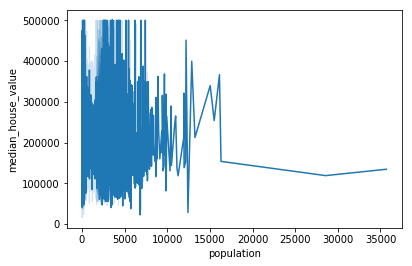

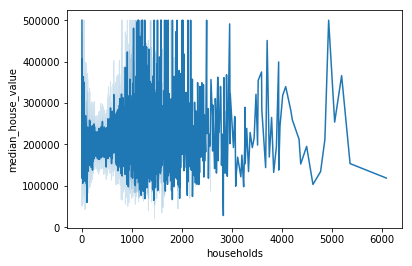

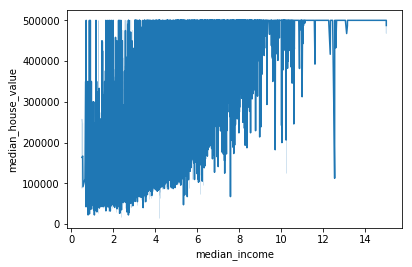

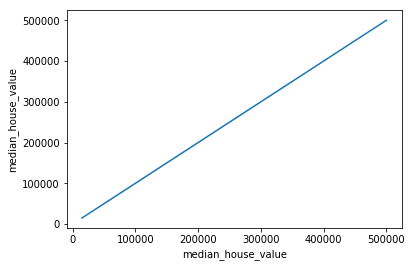

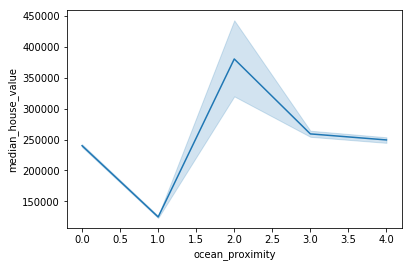

In [16]:
import warnings
warnings.filterwarnings("ignore")
plt.title("Line Plot between features and class",size=16)
column=list(data.columns)
for val in column:
    sns.lineplot(x=val,y='median_house_value', data=data)
    plt.show()

# 3.Scatter Plot 

This plot will the distribution of the house 

Text(0.5,1,'Distribution of households')

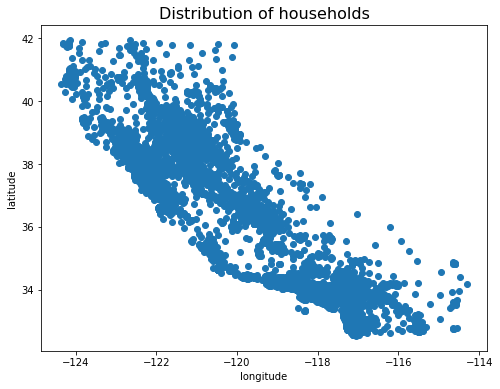

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(x=data['longitude'],y=data['latitude'])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title("Distribution of households",size=10)

# 4.Regression Plots

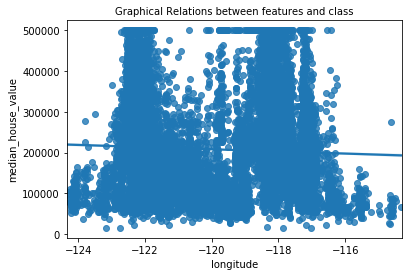

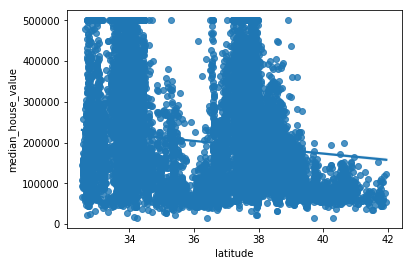

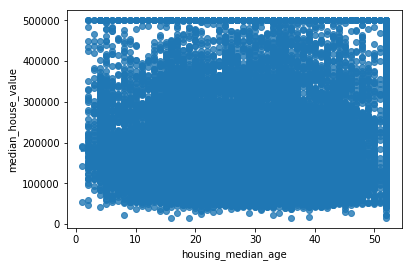

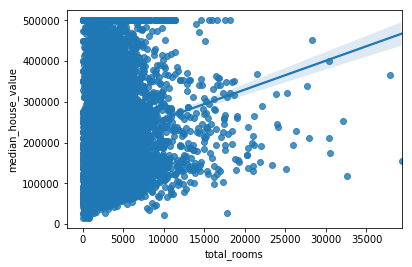

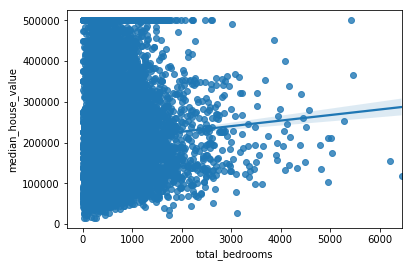

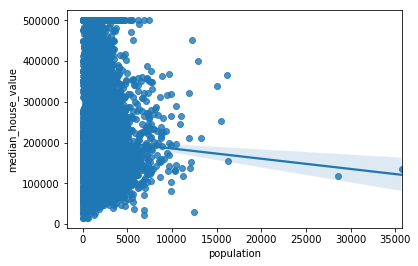

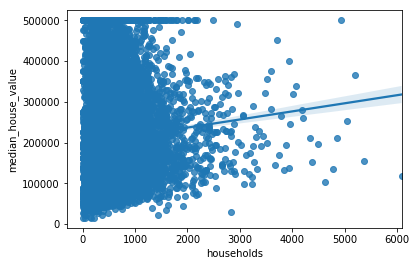

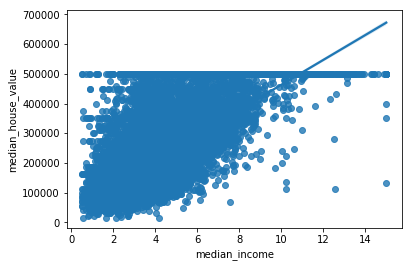

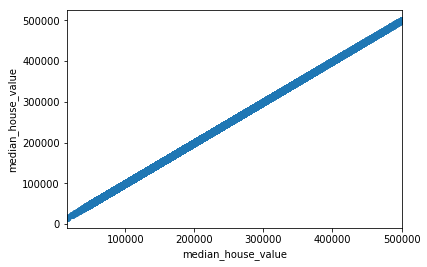

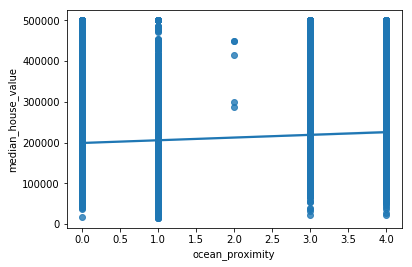

In [17]:
column=list(data.columns)
plt.title("Graphical Relations between features and class",size=10)
for val in column:
    sns.regplot(x=val,y='median_house_value', data=data)
    plt.show()


From the above line and regression plots it can be said that total bedrooms, households , median_income are higly contributing to house price

# 5. BoxPlot
The Box plot will help us to identify the outliers in the dataset, if our dataset has significant outliers then those will treated with the help of several techniques.

Lets Check for the outliers!

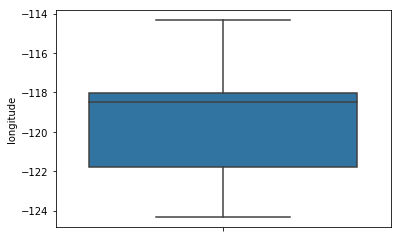

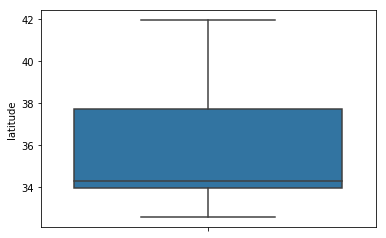

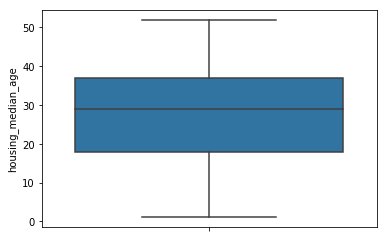

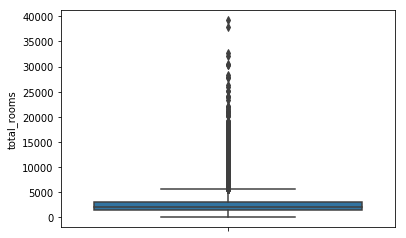

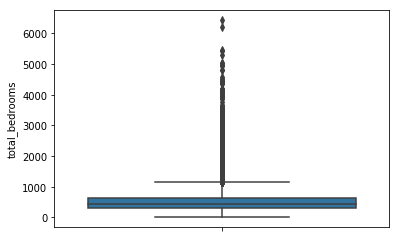

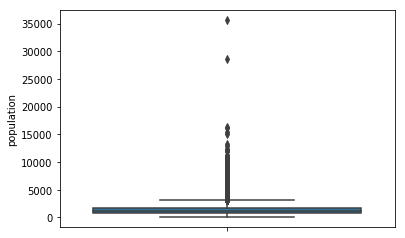

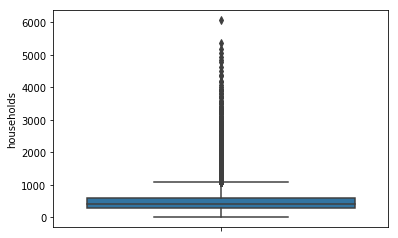

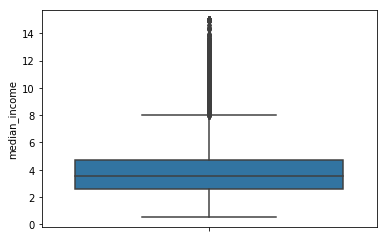

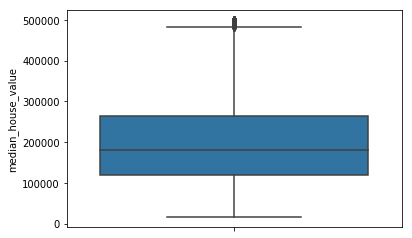

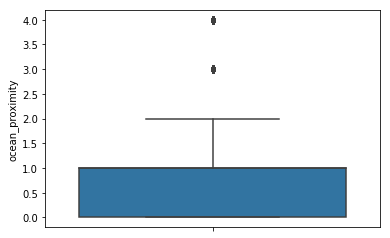

In [21]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns
for val in columns:
    sns.boxplot(y=val,data=data)
    plt.show()

# 6. PairPlots

pair plots between features


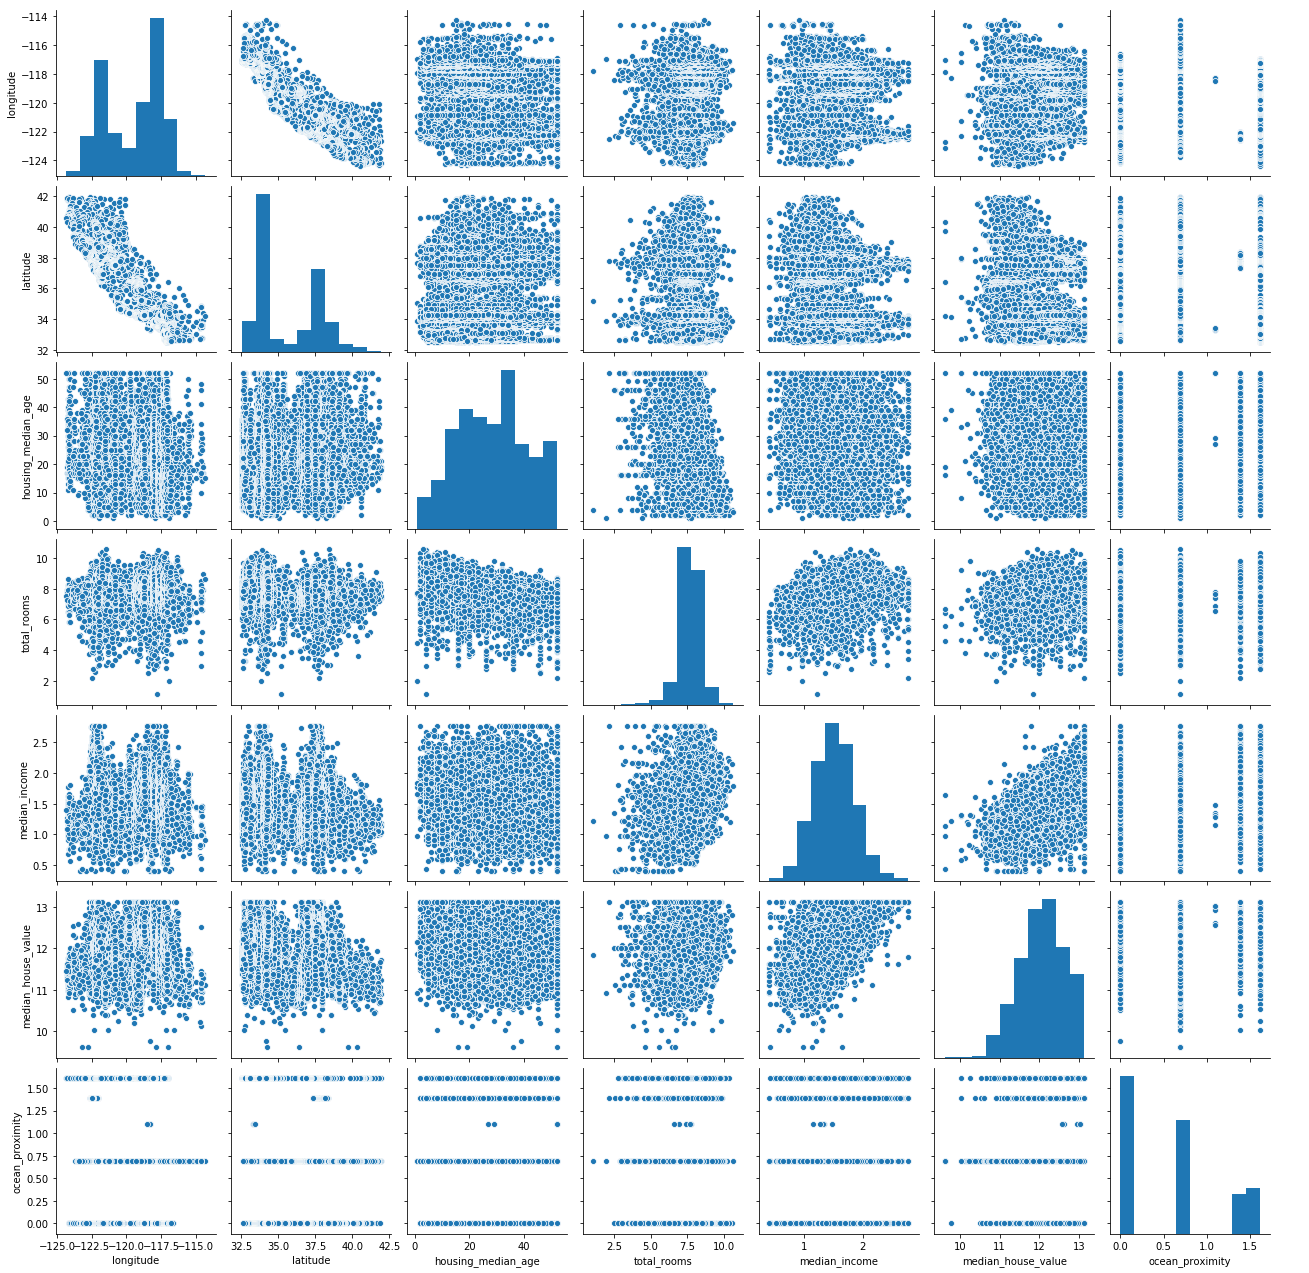

In [44]:
print("pair plots between features")
sns.pairplot(data)

# Skewness

In [36]:
data.skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms           4.147343
total_bedrooms        3.477023
population            4.935858
households            3.410438
median_income         1.646657
median_house_value    0.977763
ocean_proximity       1.016286
dtype: float64

In [37]:
from scipy import stats
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

Here in this section skewness is analysed and as skewness which can also be seen from the distribution plots in some features is treated in this section using log transformation . We will also be using scaling technique to remove the skewness in this project.

In [38]:
data.skew()

longitude            -0.297801
latitude              0.465953
housing_median_age    0.060331
total_rooms          -1.075533
total_bedrooms       -1.005686
population           -1.044087
households           -1.051607
median_income         0.226083
median_house_value   -0.173166
ocean_proximity       0.511956
dtype: float64

# CorRelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

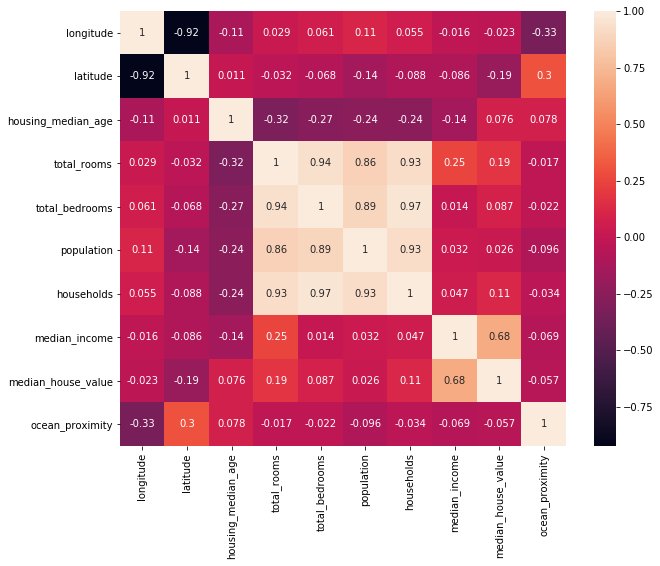

In [40]:
plt.figure(figsize=(10,8))
df_cor=data.corr()
sns.heatmap(df_cor,annot=True)

# Feature selection based on correlation matrix
From the below code I have removed the features which are having correlation of more than 0.8. This results in stable parameter estimates of classification which makes it easy to assess the effect of independent variables on dependent variables

In [41]:
columns = np.full((df_cor.shape[0]),True,dtype=bool)
for i in range(df_cor.shape[0]):
    for j in range(i+1, df_cor.shape[0]):
        if df_cor.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

By looking into the shape after performing feature selection using CorRelation ,it is been found that some correlation co_efficient are greater than 0.8 there , after removing those feature we have new shape for the data.

In [42]:
data.shape

(20640, 7)

# Standard Scaling the data for normalisation

In [54]:
y=data['median_house_value']
df_x=data.drop(['median_house_value'],axis=1)

In [46]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)

In [47]:
x=pd.DataFrame(x)

In [48]:
x.head()

,0,1,2,3,4,5
0,-1.327835,1.052548,0.982143,-1.131133,1.995505,1.338565
1,-1.322844,1.043185,-0.607019,1.651357,1.988380,1.338565
2,-1.332827,1.038503,1.856182,-0.450310,1.656444,1.338565
3,-1.337818,1.038503,1.856182,-0.638257,1.049948,1.338565
4,-1.337818,1.038503,1.856182,-0.312370,0.170631,1.338565


In [52]:
x.columns=[i for i in df_x.columns]

In [53]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,median_income,ocean_proximity
0,-1.327835,1.052548,0.982143,-1.131133,1.995505,1.338565
1,-1.322844,1.043185,-0.607019,1.651357,1.988380,1.338565
2,-1.332827,1.038503,1.856182,-0.450310,1.656444,1.338565
3,-1.337818,1.038503,1.856182,-0.638257,1.049948,1.338565
4,-1.337818,1.038503,1.856182,-0.312370,0.170631,1.338565


In [55]:
df_final = pd.concat([x, y], axis=1, sort=False)

In [56]:
df_final

,longitude,latitude,housing_median_age,total_rooms,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-1.131133,1.995505,1.338565,13.022766
1,-1.322844,1.043185,-0.607019,1.651357,1.988380,1.338565,12.789687
2,-1.332827,1.038503,1.856182,-0.450310,1.656444,1.338565,12.771673
3,-1.337818,1.038503,1.856182,-0.638257,1.049948,1.338565,12.740520
4,-1.337818,1.038503,1.856182,-0.312370,0.170631,1.338565,12.743154
...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.281605,-1.608366,0.185929,11.265758
20636,-0.818722,1.806329,-0.845393,-1.441596,-0.691819,0.185929,11.252872
20637,-0.823713,1.778237,-0.924851,0.122042,-1.460242,0.185929,11.432810
20638,-0.873626,1.778237,-0.845393,-0.134015,-1.292722,0.185929,11.346883


# Handling Outliers

In [57]:
from scipy.stats import zscore
zs=np.abs(zscore(df_final))
zs

array([[1.32783522, 1.05254828, 0.98214266, ..., 1.99550539, 1.33856546,
        1.64794879],
       [1.32284391, 1.04318455, 0.60701891, ..., 1.98838047, 1.33856546,
        1.23840284],
       [1.33282653, 1.03850269, 1.85618152, ..., 1.65644419, 1.33856546,
        1.20675137],
       ...,
       [0.8237132 , 1.77823747, 0.92485123, ..., 1.46024238, 0.18592909,
        1.14577635],
       [0.87362627, 1.77823747, 0.84539315, ..., 1.29272242, 0.18592909,
        1.29676041],
       [0.83369581, 1.75014627, 1.00430931, ..., 0.82688611, 0.18592909,
        1.20186871]])

In [60]:
df=df_final[(zs<3).all(axis=1)]
df

,longitude,latitude,housing_median_age,total_rooms,median_income,ocean_proximity,median_house_value
0,-1.327835,1.052548,0.982143,-1.131133,1.995505,1.338565,13.022766
1,-1.322844,1.043185,-0.607019,1.651357,1.988380,1.338565,12.789687
2,-1.332827,1.038503,1.856182,-0.450310,1.656444,1.338565,12.771673
3,-1.337818,1.038503,1.856182,-0.638257,1.049948,1.338565,12.740520
4,-1.337818,1.038503,1.856182,-0.312370,0.170631,1.338565,12.743154
...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.281605,-1.608366,0.185929,11.265758
20636,-0.818722,1.806329,-0.845393,-1.441596,-0.691819,0.185929,11.252872
20637,-0.823713,1.778237,-0.924851,0.122042,-1.460242,0.185929,11.432810
20638,-0.873626,1.778237,-0.845393,-0.134015,-1.292722,0.185929,11.346883


In [61]:
print('shape of the data with outliers  ' ,df_final.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (20640, 7)
shape of the data without  outliers   (20217, 7)


In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 ,The features which are having the zscore value > 3 are treated as outliers and have been removed.

Hence the new shape of the dataset after outliers removal is 20217* 7 . Now this will be our finalised Dataset for modelling.

# Separating input and output variables

In [63]:
y=df_final['median_house_value']
x=df_final.iloc[:,:-1]

# Function for R2 Score
This function is built to find the best r2 score depending on the random state while splitting the model. This function prints the best r2 score and returns the random state for that R2 score

In [66]:
from sklearn.model_selection import train_test_split
from  sklearn.metrics import r2_score
def max_r2_score(model,x,y):
    random_state=np.arange(42,101)
    max_r2_score=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        r2_scr=r2_score(test_y,pred)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if r2_scr > max_r2_score:
            max_r2_score=r2_scr
            Final_r_state=r_state
    print('The maximum r2 score  is {} at random state {}' .format(max_r2_score,Final_r_state))
    return Final_r_state

# Performing Linear Regression 

In [67]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
Final_r_state=max_r2_score(lreg,x,y)


The maximum r2 score  is 0.6495007196802769 at random state 100


# Plotting the predicted and actual price

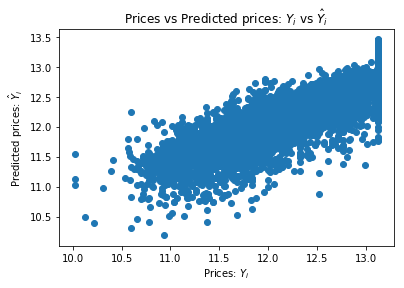

In [100]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=100)
lm = LinearRegression()
lm.fit(train_x, train_y)
Y_pred = lm.predict(test_x)
plt.scatter(test_y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# Validation Techniques

In the below section we will be performing I will be performing three validation techniques and will be selcting the best technique.

# 1.Hold Out Validation

In [105]:
from sklearn.metrics import mean_squared_error
print('RMSE',-(np.sqrt(mean_squared_error(test_y,Y_pred))))
print('R2_score in Holdout validation',r2_score(test_y,Y_pred))

RMSE -0.33821958271177116
R2_score in Holdout validation 0.6495007196802769


In this section we performed the hold out validation where we have not used any cross validation , just we found the RMSE.

# 2.Cross Validation

I am performing cross validation technique below and calculating cross_val_score using rmse as scoring parameter when cv = 10.

Note -- > when we use  cv= any number like 5 or 10 in to find the cross validation score it is called cross validation technique.

In [106]:
from sklearn.model_selection import cross_val_score
lmc = LinearRegression()
print('mean cross_val_score using RMSE as a scoring parameter',cross_val_score(lmc,x,y,cv=10,scoring='neg_mean_squared_error').mean())

mean cross_val_score using RMSE as a scoring parameter -0.12665946060903582


# 3.Leave One Out Cross Validation

I am performing Leave One Out Cross Validation technique below and calculating cross_val_score using rmse as scoring parameter when cv = len(x).

Note -- > when we use  cv= length of input variable  to find the cross validation score it is called Leave One Out Cross Validation.

In [78]:
lmk = LinearRegression()
LOO_score = cross_val_score(lmk, x, y, cv=(len(x)), scoring='neg_mean_squared_error').mean()


-0.11992229016288165


In [80]:
print('mean cross_val_score using RMSE as a scoring parameter on Leave One Out Cross Validation method',LOO_score)

mean cross_val_score using RMSE as a scoring parameter on Leave One Out Cross Validation method -0.11992229016288165


Thus from the above cros val score it is concluded that cross validation is effectively working without taking much time on the dataset.
Therefore Calculation of rmse using cross validate score by cross validation is finalised.

# Final Model

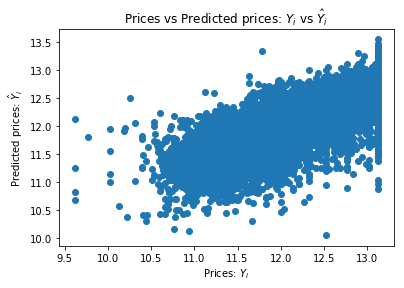

In [117]:
from sklearn.model_selection import cross_val_predict
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=100)
lmk = LinearRegression()
lmk.fit(train_x, train_y)
Y_pred = cross_val_predict(lmk, x, y, cv=10)
plt.scatter(y, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [118]:
from sklearn.model_selection import cross_val_score
print('mean cross_val_score using RMSE as a scoring parameter',cross_val_score(lmk,x,y,cv=10,scoring='neg_mean_squared_error').mean())

mean cross_val_score using RMSE as a scoring parameter -0.12665946060903582


In [111]:
print('mean cross_val_score',cross_val_score(lmk,x,y,cv=5,scoring='r2').mean())

mean cross_val_score 0.5520896115642545


In [119]:
lmk.intercept_

12.088022511087887

In [120]:
lm.coef_

array([-0.55164507, -0.5853727 ,  0.04768219,  0.0366152 ,  0.32047877,
       -0.01800798])

In [112]:
df_output=pd.DataFrame()
df_output['Actual Price']=y
df_output['PredictedPrice']=Y_pred

# Saving the Actual and predicted Price

In [113]:
df_output[['Actual Price','PredictedPrice']].to_csv('HousePricing.csv',index=False)

# Saving the Model

In [114]:
from sklearn.externals import joblib
joblib.dump(lmk,"California Housing Prices.pkl")

['California Housing Prices.pkl']